In [2]:
import numpy as np
import matplotlib.pyplot as plt

import cliff_walking as CW

##### Cliff walking environment

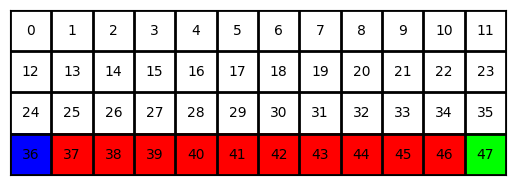

In [28]:
cw = CW.CliffWalkingEnv()
CW.print_grid(cw, print_states=True)

##### Policies for cliff walking environment
A policy can be defined in terms of a 2-dimension NumPy array. The rows represent the states and the columns represent the actions.

Shape of probabilities of policy: (48, 4)
Probabilities of policy for first six states:
[[0.33051407 0.17292247 0.20656324 0.29000022]
 [0.08132514 0.32749359 0.14424833 0.44693294]
 [0.11887723 0.09734725 0.43835905 0.34541647]
 [0.10831896 0.44201821 0.33442894 0.11523389]
 [0.32392518 0.22199752 0.1394907  0.3145866 ]
 [0.65606341 0.02524676 0.14918285 0.16950699]]


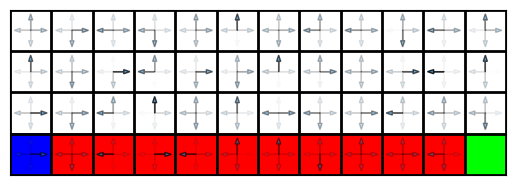

In [29]:
probs = CW.generate_random_policy(cw, deterministic=False, seed=None)
print("Shape of probabilities of policy:", probs.shape)

print("Probabilities of policy for first six states:")
print(probs[:6,:])

CW.print_policy(probs, cw)

##### Action-value functions and $\epsilon$-greedy action selection for cliff walking environment

In [30]:
Q = np.random.rand(cw.nS, cw.nA)

print("Randomly generated action-value function for first six states:")
print(Q[:6,:])

print("Associated epsilon-greedy policy with epsilon=0.0 and epsilon=0.1:")
for state in range(6):
    action_greedy = CW.select_action(state, Q, cw, epsilon=0.0)
    action_non_greedy = CW.select_action(state, Q, cw, epsilon=0.1)
    print(action_greedy, action_non_greedy)

Randomly generated action-value function for first six states:
[[0.12270173 0.52249059 0.77900097 0.20173362]
 [0.99207556 0.69259114 0.95896897 0.65418447]
 [0.67893279 0.64749341 0.30992278 0.59113712]
 [0.60595055 0.18314204 0.05213189 0.26766402]
 [0.14857959 0.65066494 0.59201454 0.67827306]
 [0.48774686 0.86313269 0.45703088 0.34137046]]
Associated epsilon-greedy policy with epsilon=0.0 and epsilon=0.1:
2 2
0 0
0 0
0 0
3 3
1 1


##### Generating an episode for cliff walking environment

In [31]:
Q = np.random.rand(cw.nS, cw.nA)
states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=0.8, max_iter=2*10e6)

print("Lengths of states, actions and rewards of generated episode:")
print(len(states), len(actions), len(rewards))

print("First and last 10 states of generated episode:")
print(states[:10], states[-10:])

Lengths of states, actions and rewards of generated episode:
18096 18095 18095
First and last 10 states of generated episode:
[36, 36, 36, 36, 24, 25, 26, 25, 13, 14] [23, 22, 21, 22, 34, 35, 35, 35, 35, 47]


##### **Exercise**: Sarsa

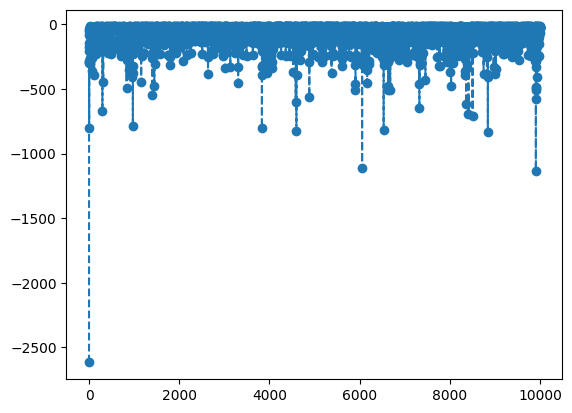

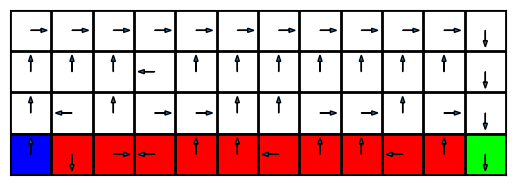

In [32]:
alpha = 0.5
gamma = 0.99
num_episodes = 10000 # number of episodes the algorithm should run

Q = np.zeros((cw.nS, cw.nA)) # initialization of action-value function
epsilon = 0.2

SARSA_sum_of_rewards_per_episode = []

for episode in range(num_episodes):

    rewards = []
    
    s = cw.reset()

    a = CW.select_action(s, Q, cw, epsilon)

    while True:

        s_prime, r, is_done = cw.step(a)
        a_prime = CW.select_action(s_prime, Q, cw, epsilon)

        rewards.append(r)

        Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_prime, a_prime] - Q[s, a])

        s = s_prime
        a = a_prime

        if is_done:
            break

    SARSA_sum_of_rewards_per_episode.append(np.sum(rewards))

# Plotting results
plt.plot(range(num_episodes), SARSA_sum_of_rewards_per_episode, 'o--')

probs_final = np.zeros_like(Q)
for state in range(cw.nS):
    action_greedy = CW.select_action(state, Q, cw, epsilon=0.0)
    probs_final[state, action_greedy] = 1.0

CW.print_policy(probs_final, cw)

##### **Exercise**: Q-learning

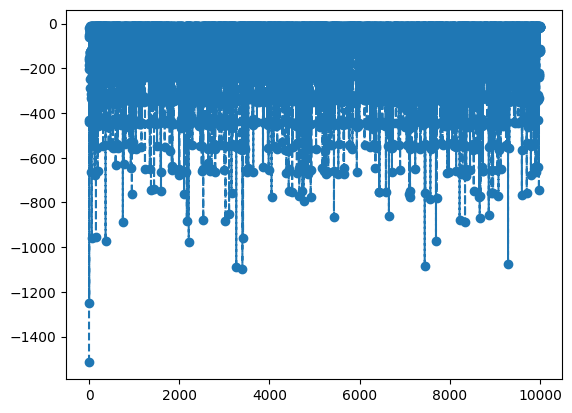

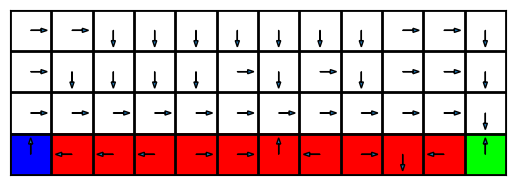

In [33]:
alpha = 0.5
gamma = 0.99
num_episodes = 10000 # number of episodes the algorithm should run

Q = np.zeros((cw.nS, cw.nA)) # initialization of action-value function
epsilon = 0.2

Q_LEARNING_sum_of_rewards_per_episode = []

for episode in range(num_episodes):

    rewards = []
    
    s = cw.reset()

    while True:

        a = CW.select_action(s, Q, cw, epsilon)

        s_prime, r, is_done = cw.step(a)
        
        a_prime_max = np.argmax(Q[s_prime])

        rewards.append(r)

        Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_prime, a_prime_max] - Q[s, a])

        s = s_prime

        if is_done:
            break

    Q_LEARNING_sum_of_rewards_per_episode.append(np.sum(rewards))

# Plotting results
plt.plot(range(num_episodes), Q_LEARNING_sum_of_rewards_per_episode, 'o--')

probs_final = np.zeros_like(Q)
for state in range(cw.nS):
    action_greedy = CW.select_action(state, Q, cw, epsilon=0.0)
    probs_final[state, action_greedy] = 1.0

CW.print_policy(probs_final, cw)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Final Policy:


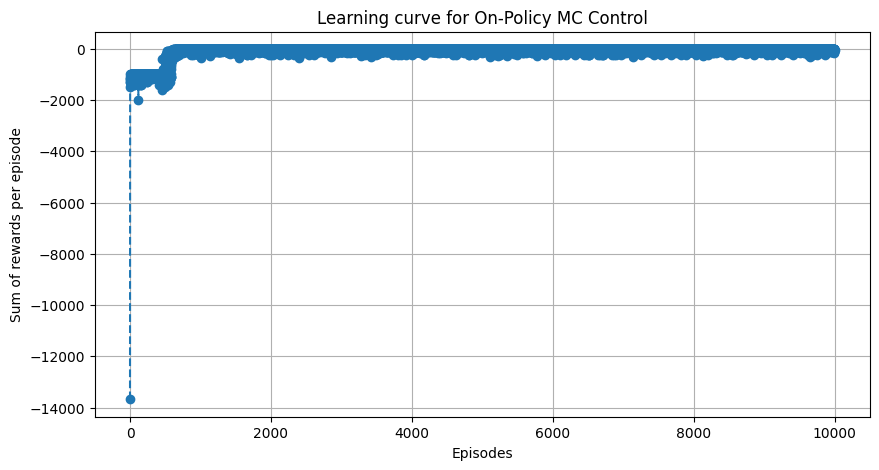

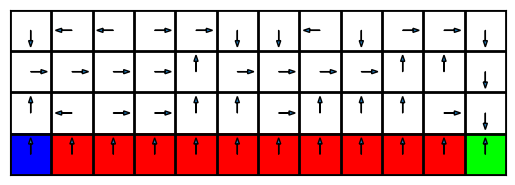

In [ ]:
from collections import defaultdict

np.random.seed(0)

def has_state_action_pair(states, actions, state, action):
    for i in range(len(states)):
        if states[i] == state and actions[i] == action:
            return True
    return False

# Parameters
epsilon = 0.2       # Epsilon for ε-greedy policy
gamma = 0.99        # Discount factor
num_episodes = 10000  # Number of episodes

# Initialize Q-table
Q = np.zeros((cw.nS, cw.nA))  # Q-values initialization
policy = np.ones((cw.nS, cw.nA))/cw.nA #policy initialisation
returns = defaultdict(list)

# For tracking performance
MC_sum_of_rewards_per_episode = []

for episode in range(num_episodes):

    if episode % 100 == 0:
        print(episode)

    # Generate an episode using current ε-greedy policy
    states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=epsilon, max_iter = 1000)
    
    # Calculate returns for each state-action pair in the episode
    G = 0

    reward = 0
    
    for t in range(len(states) - 2, -1, -1):
        s = states[t]
        a = actions[t]
        r = rewards[t]

        reward += r
        
        # Calculate return (discounted sum of rewards)
        G = gamma * G + r
        
        # First-visit MC: only update if this is the first occurrence of (s,a)
        if has_state_action_pair(states[:t], actions[:t], s, a):
            continue

        returns[(s, a)].append(G)

        Q[s, a] = np.mean(returns[(s, a)])

        best_actions = np.where(Q[s] == np.max(Q[s]))[0]
        best_action = np.random.choice(best_actions)
             
        policy[s] = epsilon / cw.nA
        policy[s, best_action] = 1 - epsilon + (epsilon / cw.nA)
            
    
    # Track performance
    MC_sum_of_rewards_per_episode.append(reward)


# Compute final deterministic policy after training finishes
probs_final = np.zeros_like(policy)
for s in range(cw.nS):
    best_a = np.argmax(policy[s])
    probs_final[s][best_a] = 1.0

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(range(num_episodes), MC_sum_of_rewards_per_episode, "o--")
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards per episode')
plt.title('Learning curve for On-Policy MC Control')
plt.grid(True)

# Print final learned policy
print("Final Policy:")
CW.print_policy(probs_final, cw)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


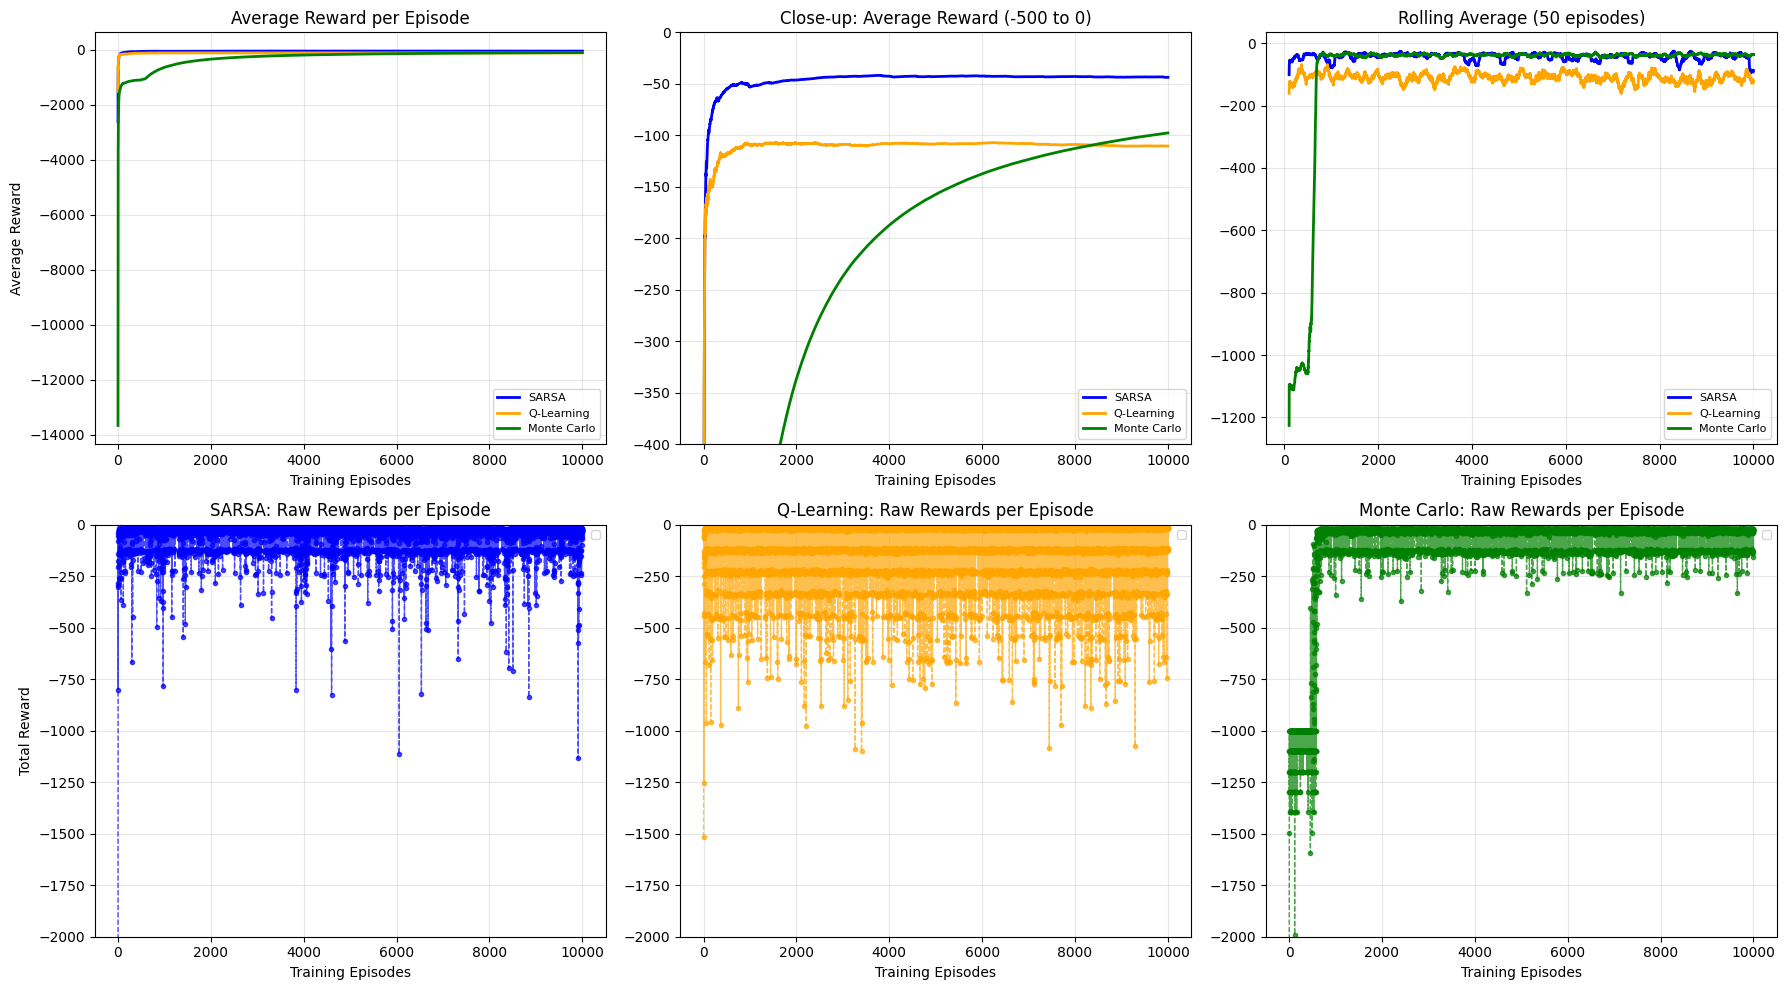

In [37]:
# Calculate cumulative average rewards
sarsa_cumulative_avg = np.zeros(len(SARSA_sum_of_rewards_per_episode))
q_learning_cumulative_avg = np.zeros(len(Q_LEARNING_sum_of_rewards_per_episode))
mc_cumulative_avg = np.zeros(len(MC_sum_of_rewards_per_episode))

for i in range(len(SARSA_sum_of_rewards_per_episode)):
    sarsa_cumulative_avg[i] = np.mean(SARSA_sum_of_rewards_per_episode[:i+1])
    q_learning_cumulative_avg[i] = np.mean(Q_LEARNING_sum_of_rewards_per_episode[:i+1])
    mc_cumulative_avg[i] = np.mean(MC_sum_of_rewards_per_episode[:i+1])

# Create x-axis values (number of episodes)
episodes = np.arange(1, len(SARSA_sum_of_rewards_per_episode) + 1)

# Define rolling window size
rolling_num = 100

# Calculate rolling averages using 50-episode window
sarsa_rolling_avg = np.convolve(SARSA_sum_of_rewards_per_episode, np.ones(rolling_num)/rolling_num, mode='valid')
q_learning_rolling_avg = np.convolve(Q_LEARNING_sum_of_rewards_per_episode, np.ones(rolling_num)/rolling_num, mode='valid')
mc_rolling_avg = np.convolve(MC_sum_of_rewards_per_episode, np.ones(rolling_num)/rolling_num, mode='valid')

# Create x-axis values for rolling average
rolling_episodes = np.arange(rolling_num, len(SARSA_sum_of_rewards_per_episode) + 1)

# Create subplots in 2 rows x 3 columns
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Increased vertical size

# First Row: Existing Average Reward Plots
## Original cumulative average rewards
axs[0,0].plot(episodes, sarsa_cumulative_avg, label='SARSA', linewidth=2, color='blue')
axs[0,0].plot(episodes, q_learning_cumulative_avg, label='Q-Learning', linewidth=2, color='orange')
axs[0,0].plot(episodes, mc_cumulative_avg, label='Monte Carlo', linewidth=2, color='green')
axs[0,0].set_title('Average Reward per Episode', fontsize=12)
axs[0,0].set_ylabel('Average Reward', fontsize=10)

## Close-up view
axs[0,1].plot(episodes, sarsa_cumulative_avg, label='SARSA', linewidth=2, color='blue')
axs[0,1].plot(episodes, q_learning_cumulative_avg, label='Q-Learning', linewidth=2, color='orange')
axs[0,1].plot(episodes, mc_cumulative_avg, label='Monte Carlo', linewidth=2, color='green')
axs[0,1].set_title('Close-up: Average Reward (-500 to 0)', fontsize=12)
axs[0,1].set_ylim(-400, 0)

## Rolling average
axs[0,2].plot(rolling_episodes, sarsa_rolling_avg, label='SARSA', linewidth=2, color='blue')
axs[0,2].plot(rolling_episodes, q_learning_rolling_avg, label='Q-Learning', linewidth=2, color='orange')
axs[0,2].plot(rolling_episodes, mc_rolling_avg, label='Monte Carlo', linewidth=2, color='green')
axs[0,2].set_title('Rolling Average (50 episodes)', fontsize=12)

# Second Row: Individual Algorithm Performance
## SARSA Raw Rewards
axs[1,0].plot(episodes, SARSA_sum_of_rewards_per_episode, 'o--', 
             markersize=3, linewidth=1, color='blue', alpha=0.7)
axs[1,0].set_title('SARSA: Raw Rewards per Episode', fontsize=12)
axs[1,0].set_ylabel('Total Reward', fontsize=10)
axs[1,0].set_ylim(-2000, 0)

## Q-Learning Raw Rewards
axs[1,1].plot(episodes, Q_LEARNING_sum_of_rewards_per_episode, 'o--', 
             markersize=3, linewidth=1, color='orange', alpha=0.7)
axs[1,1].set_title('Q-Learning: Raw Rewards per Episode', fontsize=12)
axs[1,1].set_ylim(-2000, 0)

## Monte Carlo Raw Rewards
axs[1,2].plot(episodes, MC_sum_of_rewards_per_episode, 'o--', 
             markersize=3, linewidth=1, color='green', alpha=0.7)
axs[1,2].set_title('Monte Carlo: Raw Rewards per Episode', fontsize=12)
axs[1,2].set_ylim(-2000, 0)

# Common formatting for all subplots
for row in axs:
    for ax in row:
        ax.set_xlabel('Training Episodes', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Implementation of off-policy MC

In [42]:
np.random.seed(0)

def policy_prob(state, action, Q, epsilon):
    """Calculate probability of action under target policy (ε-greedy with lower epsilon)"""
    A = np.ones(cw.nA) * epsilon / cw.nA
    best_action = np.argmax(Q[state])
    A[best_action] = 1 - epsilon + (epsilon / cw.nA)
    return A[action]

# Parameters
behavior_epsilon = 0.2  # Higher epsilon for behavior policy (more exploration)
target_epsilon = 0.0001   # Lower epsilon for target policy (more exploitation)
gamma = 0.99      # Discount factor
num_episodes = 1000   # Number of episodes

# Initialize Q-table and cumulative weights
Q = np.zeros((cw.nS, cw.nA))      # Q-values initialization
C = np.zeros((cw.nS, cw.nA))      # Cumulative weights for importance sampling
policy = np.ones((cw.nS, cw.nA))/cw.nA #policy initialisation

MC_sum_of_rewards_per_episode = []

for episode in range(num_episodes):

    if episode % 100 == 0:
        print(episode)

    states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=behavior_epsilon)

    G = 0
    W = 1

    for t in range(len(states) - 2, -1, -1):

        s = states[t]
        a = actions[t]
        r = rewards[t]

        G = gamma * G + r

        C[s, a] += W
        Q[s, a] += (W / C[s, a]) * (G - Q[s, a])

        best_actions = np.where(Q[s] == np.max(Q[s]))[0]
        best_action = np.random.choice(best_actions)

        policy[s] = np.zeros(cw.nA)
        policy[s, best_action] = 1

        if a != best_action:
            break


        W *= 1 / policy_prob(s, a, Q, behavior_epsilon)


    MC_sum_of_rewards_per_episode.append(np.sum(rewards))

# Compute final deterministic policy after training finishes
probs_final = np.zeros_like(Q)
for s in range(cw.nS):
    best_a = np.argmax(Q[s])
    probs_final[s][best_a] = 1.0

# Plotting results clearly:
plt.plot(range(num_episodes), MC_sum_of_rewards_per_episode)

# Print final learned policy clearly at end of training:
CW.print_policy(probs_final, cw)

0
100


KeyboardInterrupt: 

Training episodes: 100%|██████████| 50000/50000 [05:08<00:00, 162.17it/s]


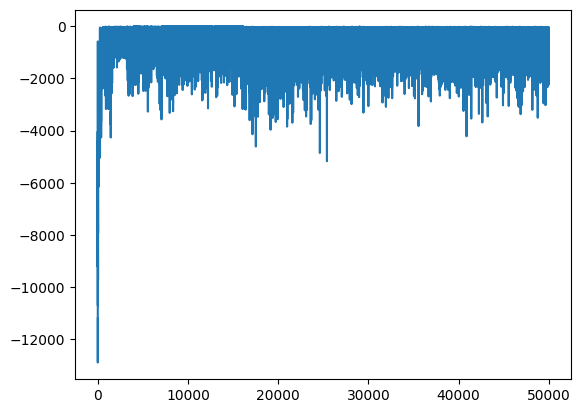

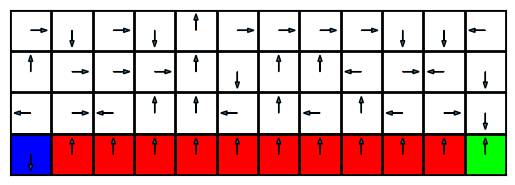

In [ ]:
from tqdm import tqdm

# Initialize
Q = np.zeros((cw.nS, cw.nA))  # Q-values initialization (arbitrary)
C = np.zeros((cw.nS, cw.nA))  # Cumulative weights for importance sampling
# Initialize policy using argmax with consistent tie-breaking
policy = np.zeros((cw.nS), dtype=int)
for s in range(cw.nS):
    policy[s] = np.argmax(Q[s])  # Ties broken by argmax implementation

# Parameters
behavior_epsilon = 0.2  # Soft behavior policy (b)
gamma = 1  # Discount factor
num_episodes = 50000  # Number of episodes

MC_sum_of_rewards_per_episode = []

# Wrap the episode loop with tqdm for a progress bar
for episode in tqdm(range(num_episodes), desc="Training episodes"):
    # Generate an episode using behavior policy b
    states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=behavior_epsilon, max_iter=100)
    
    G = 0
    W = 1
    
    # Loop for each step of episode, t = T-1, T-2, ..., 0
    for t in range(len(states) - 2, -1, -1):
        s = states[t]
        a = actions[t]
        r = rewards[t]  # R_{t+1} in pseudocode
        
        G = gamma * G + r
        
        C[s, a] = C[s, a] + W
        Q[s, a] = Q[s, a] + (W / C[s, a]) * (G - Q[s, a])
        
        # Update policy to be greedy with respect to Q
        best_actions = np.where(Q[s] == np.max(Q[s]))[0]
        best_action = np.random.choice(best_actions)
        policy[s] = best_action
        
        # Exit if action doesn't match target policy
        if a != policy[s]:
            break
        
        # Calculate behavior policy probability b(a|s)
        behavior_prob = behavior_epsilon / cw.nA
        
        # Update importance sampling ratio
        W = W * (1 / behavior_prob)
    
    MC_sum_of_rewards_per_episode.append(np.sum(rewards))

# Final deterministic policy
probs_final = np.zeros((cw.nS, cw.nA))
for s in range(cw.nS):
    probs_final[s, policy[s]] = 1.0

# Plotting results
plt.plot(range(num_episodes), MC_sum_of_rewards_per_episode)

# Print final learned policy
CW.print_policy(probs_final, cw)


0.1
0.2
0.3
0.4
0.5
0.6
0.7


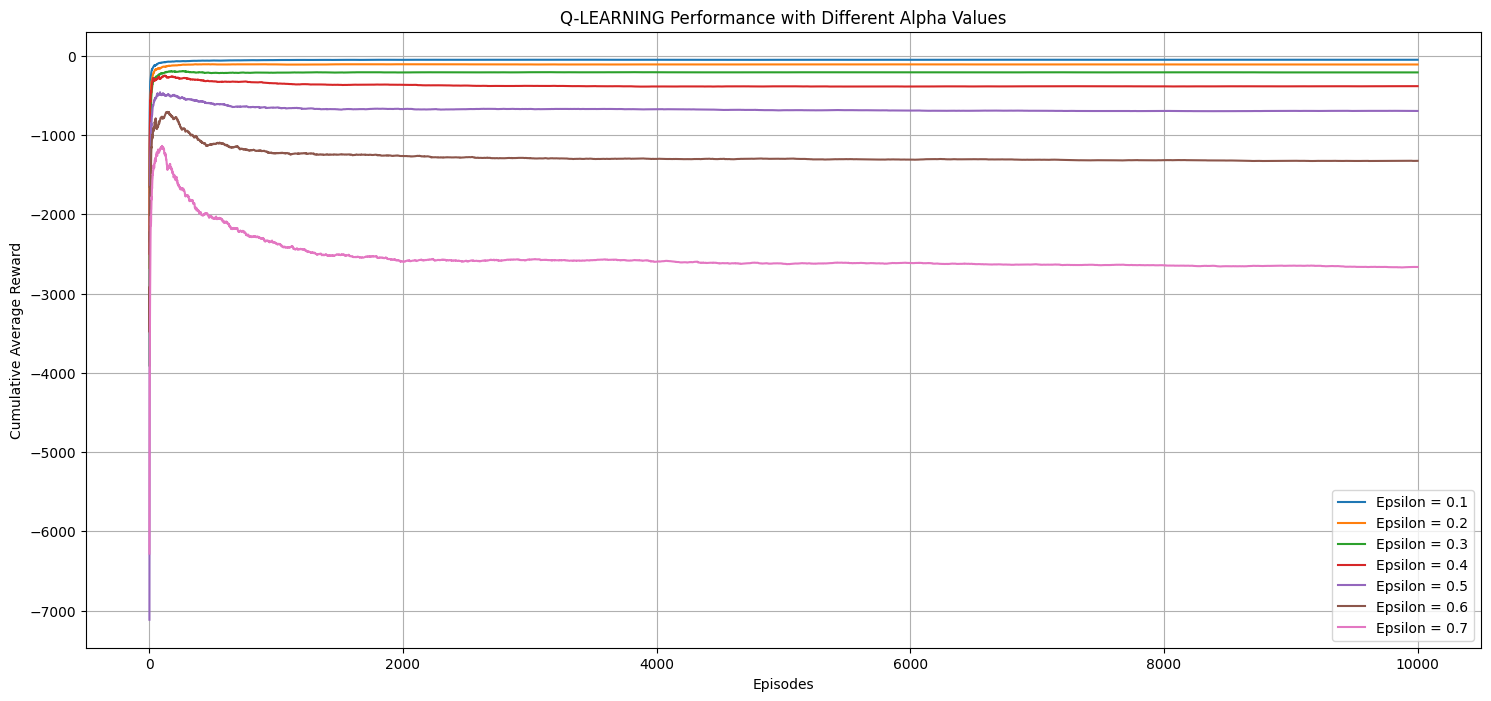

In [79]:
def q_model(alpha=0.5, gamma=0.99, num_episodes=10000, epsilon=0.1):

    Q = np.zeros((cw.nS, cw.nA)) # initialization of action-value function

    Q_LEARNING_sum_of_rewards_per_episode = []

    for episode in range(num_episodes):

        rewards = []
        
        s = cw.reset()

        while True:

            a = CW.select_action(s, Q, cw, epsilon)

            s_prime, r, is_done = cw.step(a)
            
            a_prime_max = np.argmax(Q[s_prime])

            rewards.append(r)

            Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_prime, a_prime_max] - Q[s, a])

            s = s_prime

            if is_done:
                break

        Q_LEARNING_sum_of_rewards_per_episode.append(np.sum(rewards))

    n = len(Q_LEARNING_sum_of_rewards_per_episode)
    episodes = np.arange(1, n + 1)

    # Calculate cumulative averages in one step
    cumulative_avg = np.cumsum(Q_LEARNING_sum_of_rewards_per_episode) / episodes

    return cumulative_avg, Q

plt.figure(figsize=(18, 8))

for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:

    print(epsilon)

    cum_avg, Q = q_model(epsilon = epsilon)
    plt.plot(episodes, cum_avg, label=f'Epsilon = {epsilon}')

plt.xlabel('Episodes')
plt.ylabel('Cumulative Average Reward')
plt.title('Q-LEARNING Performance with Different Alpha Values')
plt.legend()
plt.grid(True)
#plt.ylim(-1000, 0)  # Set y-axis limits from -100 to 0
plt.show()

0.1
0.2
0.3
0.4
0.5
0.6
0.7


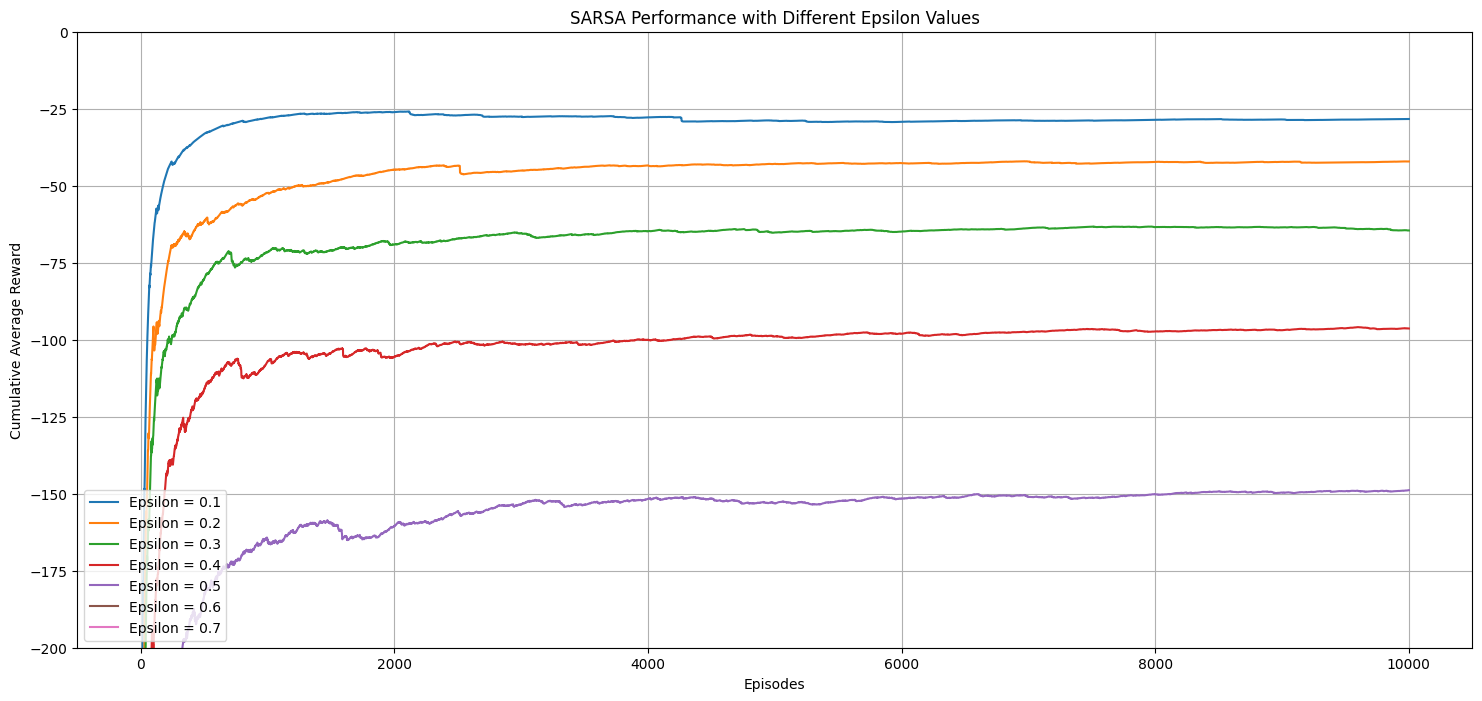

In [83]:
def sarsa_model(alpha=0.5, gamma=0.99, num_episodes=10000, epsilon=0.1):

    Q = np.zeros((cw.nS, cw.nA)) # initialization of action-value function

    SARSA_sum_of_rewards_per_episode = []

    for episode in range(num_episodes):

        rewards = 0
        
        s = cw.reset()

        a = CW.select_action(s, Q, cw, epsilon)

        while True:

            s_prime, r, is_done = cw.step(a)
            a_prime = CW.select_action(s_prime, Q, cw, epsilon)

            rewards += r

            Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s_prime, a_prime] - Q[s, a])

            s = s_prime
            a = a_prime

            if is_done:
                break

        SARSA_sum_of_rewards_per_episode.append(rewards)

    n = len(SARSA_sum_of_rewards_per_episode)
    episodes = np.arange(1, n + 1)

    # Calculate cumulative averages in one step
    cumulative_avg = np.cumsum(SARSA_sum_of_rewards_per_episode) / episodes

    return cumulative_avg, Q

plt.figure(figsize=(18, 8))

for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:

    print(epsilon)

    cum_avg, Q = sarsa_model(epsilon = epsilon)
    plt.plot(episodes, cum_avg, label=f'Epsilon = {epsilon}')

plt.xlabel('Episodes')
plt.ylabel('Cumulative Average Reward')
plt.title('SARSA Performance with Different Epsilon Values')
plt.legend()
plt.grid(True)
plt.ylim(-200, 0)  # Set y-axis limits from -100 to 0
plt.show()

0.1
0.2
0.3
0.4
0.5
0.6
0.7


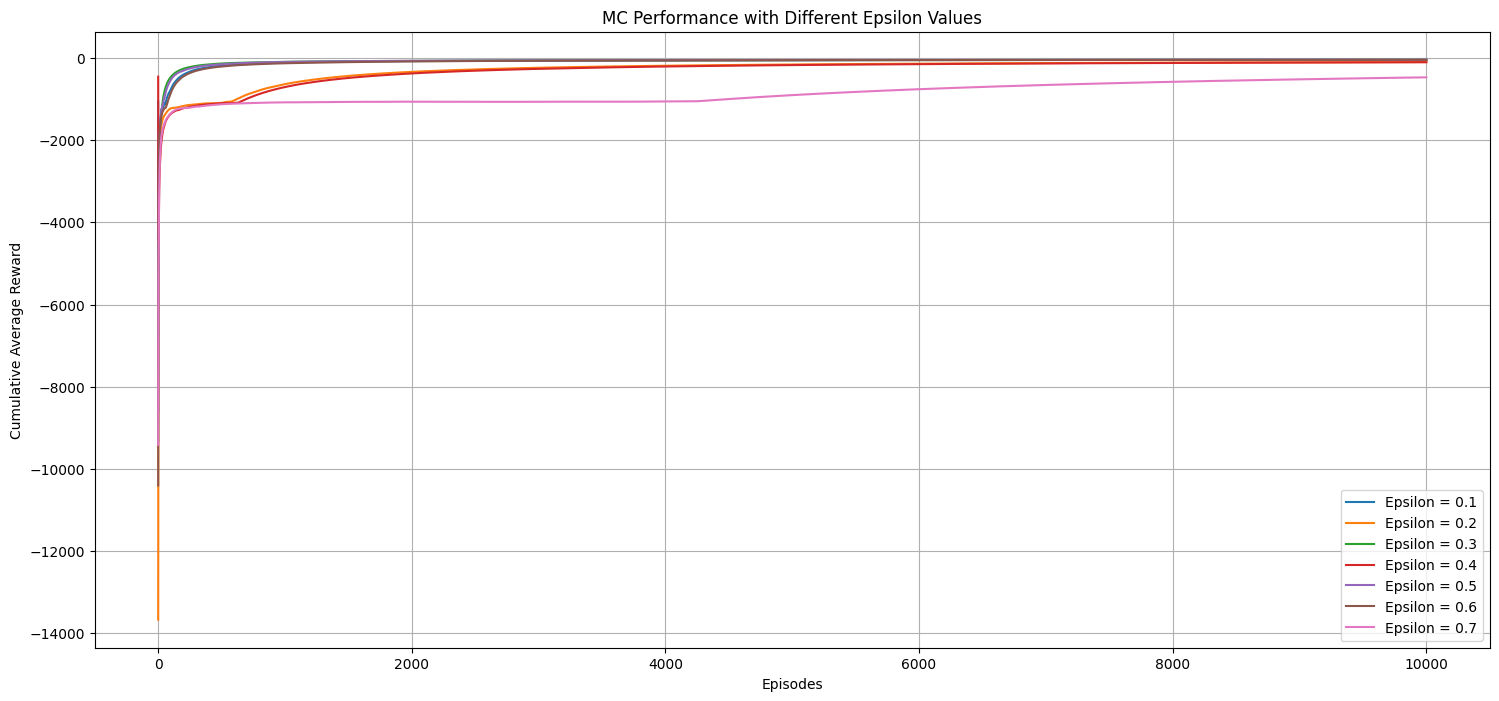

In [82]:
from collections import defaultdict

np.random.seed(0)

def has_state_action_pair(states, actions, state, action):
    for i in range(len(states)):
        if states[i] == state and actions[i] == action:
            return True
    return False

def mc_model(alpha=0.5, gamma=0.99, num_episodes=10000, epsilon=0.1):

    # Parameters
    epsilon = 0.2       # Epsilon for ε-greedy policy
    gamma = 0.99        # Discount factor
    num_episodes = 10000  # Number of episodes

    # Initialize Q-table
    Q = np.zeros((cw.nS, cw.nA))  # Q-values initialization
    policy = np.ones((cw.nS, cw.nA))/cw.nA #policy initialisation
    returns = defaultdict(list)

    # For tracking performance
    MC_sum_of_rewards_per_episode = []

    for episode in range(num_episodes):

        # Generate an episode using current ε-greedy policy
        states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=epsilon, max_iter = 1000)
        
        # Calculate returns for each state-action pair in the episode
        G = 0

        reward = 0
        
        for t in range(len(states) - 2, -1, -1):
            s = states[t]
            a = actions[t]
            r = rewards[t]

            reward += r
            
            # Calculate return (discounted sum of rewards)
            G = gamma * G + r
            
            # First-visit MC: only update if this is the first occurrence of (s,a)
            if has_state_action_pair(states[:t], actions[:t], s, a):
                continue

            returns[(s, a)].append(G)

            Q[s, a] = np.mean(returns[(s, a)])

            best_actions = np.where(Q[s] == np.max(Q[s]))[0]
            best_action = np.random.choice(best_actions)
                
            policy[s] = epsilon / cw.nA
            policy[s, best_action] = 1 - epsilon + (epsilon / cw.nA)
                
        
        # Track performance
        MC_sum_of_rewards_per_episode.append(reward)

    n = len(MC_sum_of_rewards_per_episode)
    episodes = np.arange(1, n + 1)

    # Calculate cumulative averages in one step
    cumulative_avg = np.cumsum(MC_sum_of_rewards_per_episode) / episodes

    return cumulative_avg, Q

plt.figure(figsize=(18, 8))

for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:

    print(epsilon)

    cum_avg, Q = mc_model(epsilon = epsilon)
    plt.plot(episodes, cum_avg, label=f'Epsilon = {epsilon}')

plt.xlabel('Episodes')
plt.ylabel('Cumulative Average Reward')
plt.title('MC Performance with Different Epsilon Values')
plt.legend()
plt.grid(True)
#plt.ylim(-100, 0)  # Set y-axis limits from -100 to 0
plt.show()

Training Episodes: 100%|██████████| 50000/50000 [25:45<00:00, 32.35it/s] 


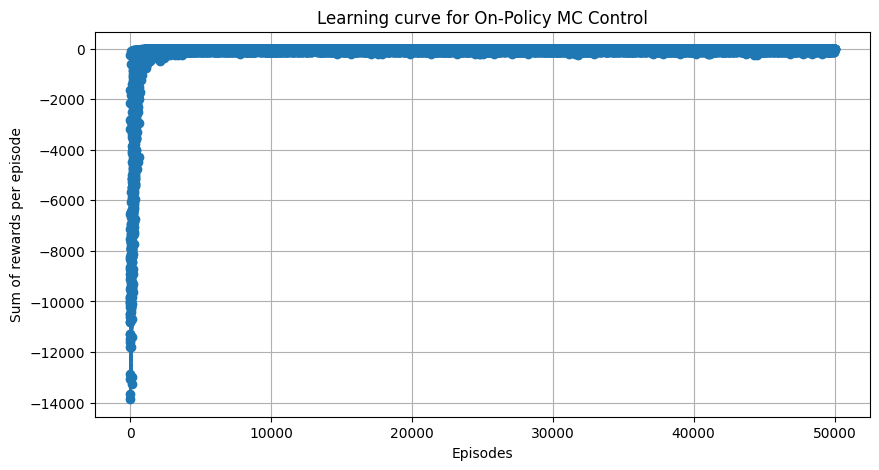

Final Policy:


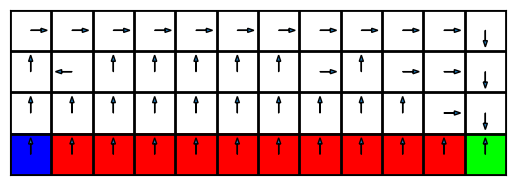

In [101]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm  # Import tqdm for progress bar

def has_state_action_pair(states, actions, state, action):
    for i in range(len(states)):
        if states[i] == state and actions[i] == action:
            return True
    return False

# Parameters
epsilon = 1      # Epsilon for ε-greedy policy
gamma = 0.99        # Discount factor
num_episodes = 50000  # Number of episodes
epsilon_decay_rate = 0.9995 # Decay rate per episode
min_epsilon = 0.1

# Initialize Q-table
Q = np.zeros((cw.nS, cw.nA))  # Q-values initialization
policy = np.ones((cw.nS, cw.nA))/cw.nA #policy initialisation
returns = defaultdict(list)

# For tracking performance
MC_sum_of_rewards_per_episode = []

# Use tqdm for progress bar
for episode in tqdm(range(num_episodes), desc="Training Episodes"):
    # Generate an episode using current ε-greedy policy
    states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=epsilon, max_iter=1000)
    
    # Calculate returns for each state-action pair in the episode
    G = 0
    reward = 0
    
    for t in range(len(states) - 2, -1, -1):
        s = states[t]
        a = actions[t]
        r = rewards[t]

        reward += r
        
        # Calculate return (discounted sum of rewards)
        G = gamma * G + r
        
        # First-visit MC: only update if this is the first occurrence of (s,a)
        if has_state_action_pair(states[:t], actions[:t], s, a):
            continue

        returns[(s, a)].append(G)
        Q[s, a] = np.mean(returns[(s, a)])

        best_actions = np.where(Q[s] == np.max(Q[s]))[0]
        best_action = np.random.choice(best_actions)
             
        policy[s] = epsilon / cw.nA
        policy[s, best_action] = 1 - epsilon + (epsilon / cw.nA)
    
    # Track performance
    MC_sum_of_rewards_per_episode.append(reward)

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay_rate)

# Compute final deterministic policy after training finishes
probs_final = np.zeros_like(policy)
for s in range(cw.nS):
    best_a = np.argmax(policy[s])
    probs_final[s][best_a] = 1.0

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(range(num_episodes), MC_sum_of_rewards_per_episode, "o--")
plt.xlabel('Episodes')
plt.ylabel('Sum of rewards per episode')
plt.title('Learning curve for On-Policy MC Control')
plt.grid(True)
plt.show()

# Print final learned policy
print("Final Policy:")
CW.print_policy(probs_final, cw)

Training Episodes: 100%|██████████| 50000/50000 [28:28<00:00, 29.27it/s] 


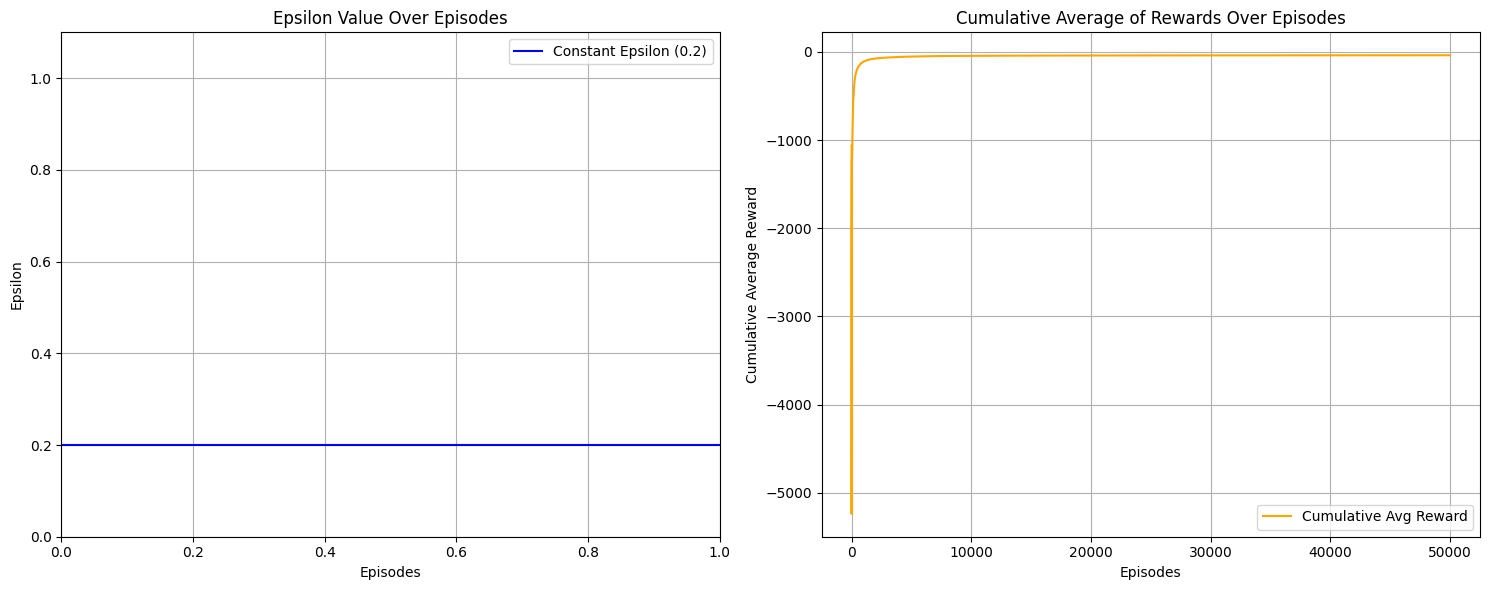

Final Policy:


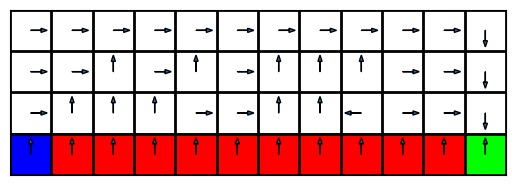

In [102]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(0)

def has_state_action_pair(states, actions, state, action):
    for i in range(len(states)):
        if states[i] == state and actions[i] == action:
            return True
    return False

# Parameters
epsilon = 0.2       # Constant epsilon for ε-greedy policy
gamma = 0.99        # Discount factor
num_episodes = 50000  # Number of episodes

# Initialize Q-table
Q = np.zeros((cw.nS, cw.nA))  # Q-values initialization
policy = np.ones((cw.nS, cw.nA))/cw.nA #policy initialisation
returns = defaultdict(list)

# For tracking performance
MC_sum_of_rewards_per_episode_constant = []

# Use tqdm for progress tracking
for episode in tqdm(range(num_episodes), desc="Training Episodes"):
    # Generate an episode using current ε-greedy policy
    states, actions, rewards = CW.simulate_episode(cw, Q, epsilon=epsilon, max_iter=1000)
    
    # Calculate returns for each state-action pair in the episode
    G = 0
    reward = 0
    
    for t in range(len(states) - 2, -1, -1):
        s = states[t]
        a = actions[t]
        r = rewards[t]

        reward += r
        
        # Calculate return (discounted sum of rewards)
        G = gamma * G + r
        
        # First-visit MC: only update if this is the first occurrence of (s,a)
        if has_state_action_pair(states[:t], actions[:t], s, a):
            continue

        returns[(s, a)].append(G)
        Q[s, a] = np.mean(returns[(s, a)])

        best_actions = np.where(Q[s] == np.max(Q[s]))[0]
        best_action = np.random.choice(best_actions)
             
        policy[s] = epsilon / cw.nA
        policy[s, best_action] = 1 - epsilon + (epsilon / cw.nA)
            
    # Track performance
    MC_sum_of_rewards_per_episode_constant.append(reward)

# Compute final deterministic policy after training finishes
probs_final = np.zeros_like(policy)
for s in range(cw.nS):
    best_a = np.argmax(policy[s])
    probs_final[s][best_a] = 1.0

# Calculate cumulative average rewards
cumulative_avg_rewards = np.cumsum(MC_sum_of_rewards_per_episode_constant) / np.arange(1, num_episodes + 1)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot constant epsilon
plt.subplot(1, 2, 1)
plt.axhline(y=epsilon, color='blue', linestyle='-', label=f'Constant Epsilon ({epsilon})')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.title('Epsilon Value Over Episodes')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)

# Plot cumulative average of rewards
plt.subplot(1, 2, 2)
plt.plot(range(num_episodes), cumulative_avg_rewards, label='Cumulative Avg Reward', color='orange')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Average Reward')
plt.title('Cumulative Average of Rewards Over Episodes')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print final learned policy
print("Final Policy:")
CW.print_policy(probs_final, cw)


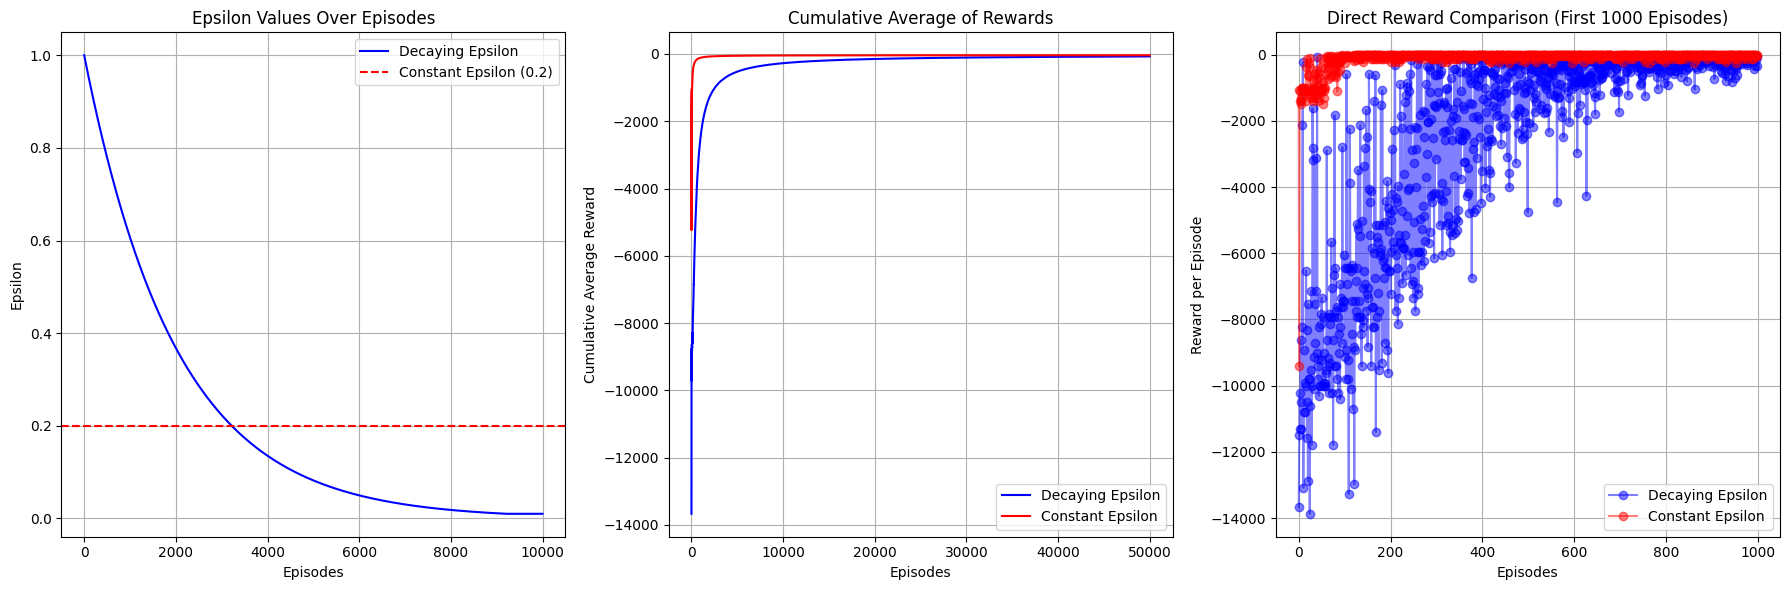

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with three subplots
plt.figure(figsize=(18, 6))

# Plot 1: Epsilon Decrease for the first algorithm
plt.subplot(1, 3, 1)
epsilon_values = []
epsilon_track = 1.0  # Start with initial epsilon
for _ in range(10000):
    epsilon_values.append(epsilon_track)
    epsilon_track = max(0.01, epsilon_track * 0.9995)

plt.plot(range(10000), epsilon_values, label='Decaying Epsilon', color='blue')
plt.axhline(y=0.2, color='red', linestyle='--', label='Constant Epsilon (0.2)')
plt.xlabel('Episodes')
plt.ylabel('Epsilon')
plt.title('Epsilon Values Over Episodes')
plt.grid(True)
plt.legend()

# Plot 2: Cumulative Average Rewards for both algorithms
plt.subplot(1, 3, 2)
# Assuming MC_sum_of_rewards_per_episode_decaying contains rewards from the first algorithm
# And MC_sum_of_rewards_per_episode_constant contains rewards from the second algorithm
cumulative_avg_rewards_decaying = np.cumsum(MC_sum_of_rewards_per_episode) / np.arange(1, len(MC_sum_of_rewards_per_episode) + 1)
# For the constant epsilon algorithm, we only have 1000 episodes
cumulative_avg_rewards_constant = np.cumsum(MC_sum_of_rewards_per_episode_constant) / np.arange(1, len(MC_sum_of_rewards_per_episode_constant) + 1)

plt.plot(range(len(MC_sum_of_rewards_per_episode)), cumulative_avg_rewards_decaying, label='Decaying Epsilon', color='blue')
plt.plot(range(len(MC_sum_of_rewards_per_episode)), cumulative_avg_rewards_constant, label='Constant Epsilon', color='red')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Average Reward')
plt.title('Cumulative Average of Rewards')
plt.grid(True)
plt.legend()

# Plot 3: Direct comparison of rewards for the first 1000 episodes
plt.subplot(1, 3, 3)
plt.plot(range(1000), MC_sum_of_rewards_per_episode[:1000], 'o-', alpha=0.5, label='Decaying Epsilon', color='blue')
plt.plot(range(1000), MC_sum_of_rewards_per_episode_constant[:1000], 'o-', alpha=0.5, label='Constant Epsilon', color='red')
plt.xlabel('Episodes')
plt.ylabel('Reward per Episode')
plt.title('Direct Reward Comparison (First 1000 Episodes)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
